## BANK TRANSACTION ANORMALY DETECTION

**AIM AND OBJECTIVES**

The specific aim of this study is to design a machine learning model for detecting anomaly in bank transfers. 
The objectives of the study are: 
1. Data Curation and processing 
2. Development of a machine learning model that preprocesses transfer data, computes the chosen features, runs the selected anomaly detection algorithms, and outputs flagged transactions. 
3. Evaluate Model performance: Measure detector/classifier performance using appropriate metrics.

### Data loading and initial inspection

In [44]:
#Importing the dataset
import pandas as pd
#Importing date and time library for date and time column handling
import datetime as dt

In [2]:
#Loading the dataset
df = pd.read_csv("bank_transactions_data_2.csv")
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,4/11/2023 16:29,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,11/4/2024 8:08
1,TX000002,AC00455,376.24,6/27/2023 16:44,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,11/4/2024 8:09
2,TX000003,AC00019,126.29,7/10/2023 18:16,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,11/4/2024 8:07
3,TX000004,AC00070,184.50,5/5/2023 16:32,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,11/4/2024 8:09
4,TX000005,AC00411,13.45,10/16/2023 17:51,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,11/4/2024 8:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,4/26/2023 17:09,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,11/4/2024 8:11
2508,TX002509,AC00322,251.54,3/22/2023 17:36,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,11/4/2024 8:11
2509,TX002510,AC00095,28.63,8/21/2023 17:08,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,11/4/2024 8:08
2510,TX002511,AC00118,185.97,2/24/2023 16:24,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,11/4/2024 8:12


In [3]:
#inspecting the dataset
#Checking the columns in the dataset
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [4]:
#Checking the size of the dataset
df.shape

(2512, 16)

- Number of rows = 2512
- Number of columns = 16

In [5]:
#Cheking the dataset infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [6]:
#Describing the dataset
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [7]:
#Saving a copy of the dataset
raw = df.copy()

### Data curation and cleaning

In [21]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,4/11/2023 16:29,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,11/4/2024 8:08
1,TX000002,AC00455,376.24,6/27/2023 16:44,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,11/4/2024 8:09
2,TX000003,AC00019,126.29,7/10/2023 18:16,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,11/4/2024 8:07
3,TX000004,AC00070,184.50,5/5/2023 16:32,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,11/4/2024 8:09
4,TX000005,AC00411,13.45,10/16/2023 17:51,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,11/4/2024 8:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,4/26/2023 17:09,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,11/4/2024 8:11
2508,TX002509,AC00322,251.54,3/22/2023 17:36,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,11/4/2024 8:11
2509,TX002510,AC00095,28.63,8/21/2023 17:08,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,11/4/2024 8:08
2510,TX002511,AC00118,185.97,2/24/2023 16:24,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,11/4/2024 8:12


In [24]:
# Formatting the date/time data  columns in the dataset
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], errors = "coerce")
df["PreviousTransactionDate"] = pd.to_datetime(df["PreviousTransactionDate"], errors = "coerce")
df["TransactionDate"].dtype

dtype('<M8[ns]')

In [27]:
#Checking for duplicates in the dataset
df.duplicated().sum()

np.int64(0)

In [28]:
#Checking for missing values in the dataset
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [29]:
#Checking the current information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [30]:
#Describing the TransactionAmount column checking for data errors
df["TransactionAmount"].describe()

count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64

In [57]:
#Cheking for parse errors in the formatted transaction date 
(df["TransactionDate"].dt.date == pd.to_datetime("2023-4-11").date()).sum()

np.int64(5)

In [61]:
#Checking for parse error in the formatted transaction time
(df["TransactionDate"].dt.time == pd.to_datetime("16:29:00").time()).sum()

np.int64(18)

No error in the transaction time

### Exploratory Data Analytics (EDA)

**Goal: understanding the distributions, relationships, and candidates for engineered features.**


**UNIVARIATE ANALYSIS**

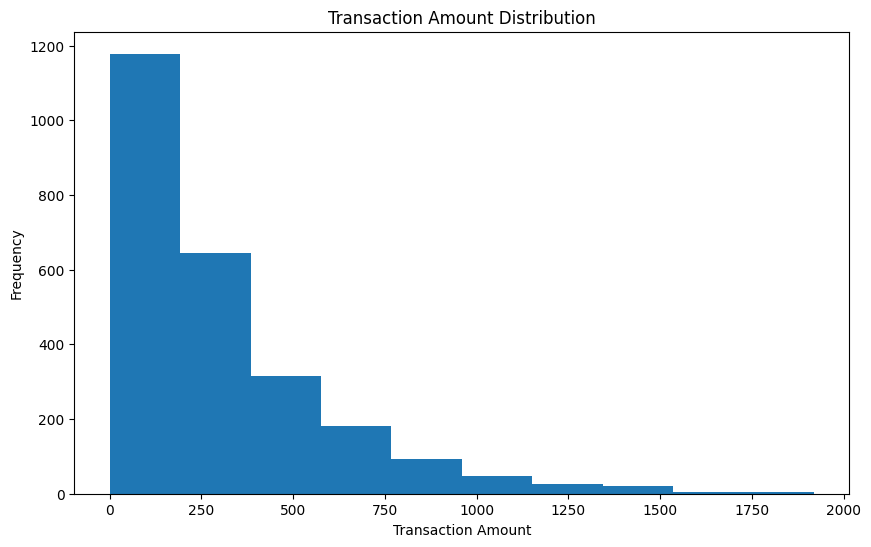

In [62]:
#Checking the amount distribution
plot = df["TransactionAmount"]
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 6))
plt.hist(plot)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

**Insight**

The transaction amount distribution is highly right-skewed, 
meaning most transactions are of low value (below ₦250), while very few are above ₦1000. 
This indicates that customers tend to make small payments more often.

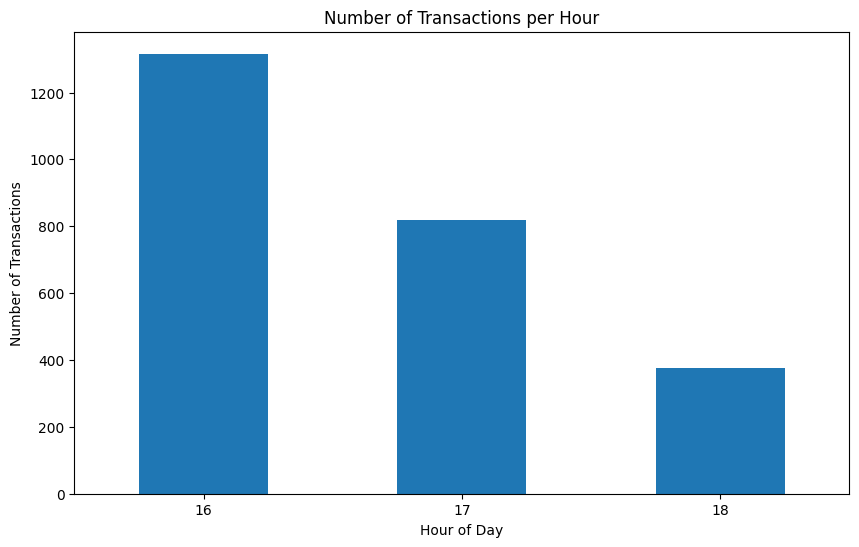

In [ ]:
# Count of transactions per hour.

df.groupby(df['TransactionDate'].dt.hour)['TransactionAmount'].count().plot(kind='bar', figsize=(10,6))
plt.title("Number of Transactions per Hour")
plt.xticks(rotation = "horizontal")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.show()

**Insight**

The bar chart illustrates the distribution of transactions across different hours of the day. From the visualization, it is observed that the highest number of transactions occurred at the 16th hour (4:00 PM), with approximately 1,300 transactions recorded. This represents the peak transaction period within the observed timeframe.

At 17:00 (5:00 PM), the number of transactions dropped moderately to around 800, indicating a decline in user activity after the peak hour. By 18:00 (6:00 PM), transaction volume further decreased to about 380, showing a consistent downward trend as the day progressed.

This pattern suggests that transaction activity is highest in the late afternoon, possibly due to increased user engagement or business operations during that time, and gradually tapers off towards the evening.

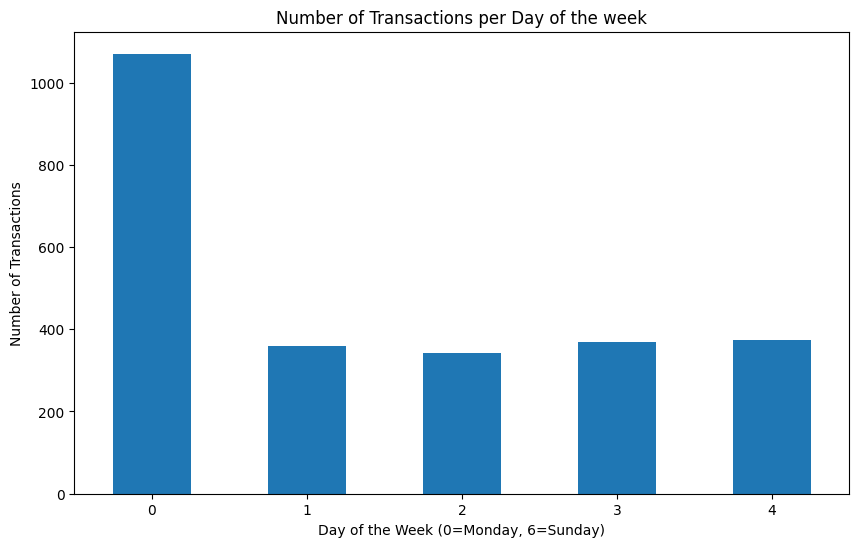

In [76]:
# Count of transactions day-of-week.

df.groupby(df['TransactionDate'].dt.day_of_week)['TransactionAmount'].count().plot(kind='bar', figsize=(10,6))
plt.title("Number of Transactions per Day of the week")
plt.xticks(rotation = "horizontal")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Number of Transactions")
plt.show()

**Insight**

The bar chart illustrating the number of transactions per day of the week reveals a clear variation in transactional activity across different weekdays. The data shows that Monday (Day 0) recorded the highest volume of transactions, with approximately 1,070 transactions, indicating a significant concentration of customer or user activity at the start of the week.

From Tuesday to Friday (Days 1–4), the number of transactions remained relatively stable, ranging between 340 and 370 transactions per day. This suggests a consistent but moderate level of activity during midweek, possibly reflecting routine or operational transactions.

Notably, there were no recorded transactions for Saturday and Sunday (Days 5 and 6), which may imply that transactions are limited to business days only—potentially due to organizational policies, reduced weekend operations, or data unavailability for those periods.

Overall, the trend highlights that transaction frequency is heavily skewed toward the beginning of the week, suggesting that operational or customer-driven activities peak on Mondays and taper off as the week progresses.

In [85]:
# Frequency of accounts (top senders).
plot = df['AccountID'].value_counts().sort_values(ascending= False).head(10)
plot

AccountID
AC00362    12
AC00460    12
AC00363    12
AC00202    12
AC00456    11
AC00304    11
AC00480    11
AC00225    11
AC00257    11
AC00267    10
Name: count, dtype: int64

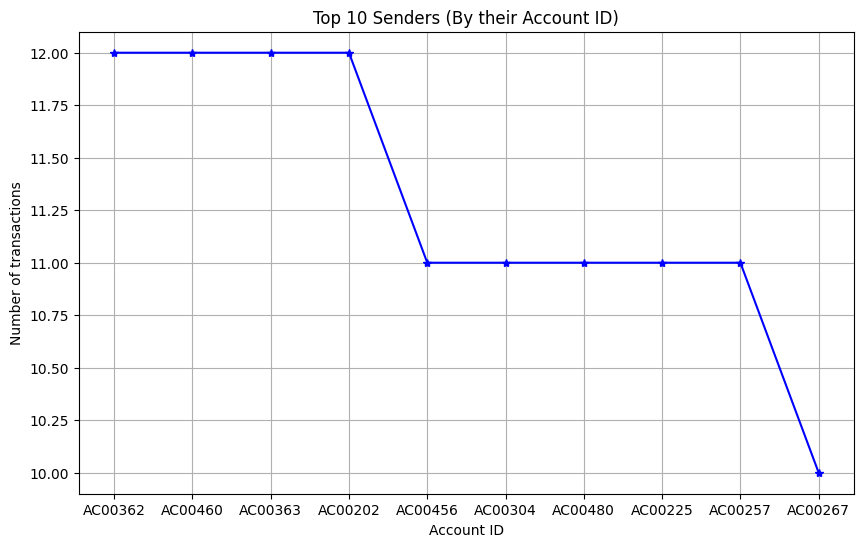

In [92]:
# Visualizing the top senders
plt.figure(figsize = (10,6))
plt.plot(plot, color = "blue", marker = "*")
plt.title("Top 10 Senders (By their Account ID)")
plt.xlabel("Account ID")
plt.ylabel("Number of transactions")
plt.grid()

**Insight**

The visualization represents the top 10 most active accounts based on the number of transactions recorded in the dataset. From the chart, accounts AC00362, AC00460, AC00363, and AC00202 each recorded 12 transactions, making them the most frequent senders. These are closely followed by accounts such as AC00456, AC00304, and AC00480, each with 11 transactions, while AC00267 completes the list with 10 transactions.

This pattern indicates that a small subset of customers is responsible for a significant number of transactions, which could reflect:

- High-value or frequent users (e.g., business or premium accounts).

- Possible customer loyalty or engagement trends, showing repeated transactions over time.

- Alternatively, such repetitive activity may warrant further investigation for anomalies or potential fraud detection.

### Bivariate analysis

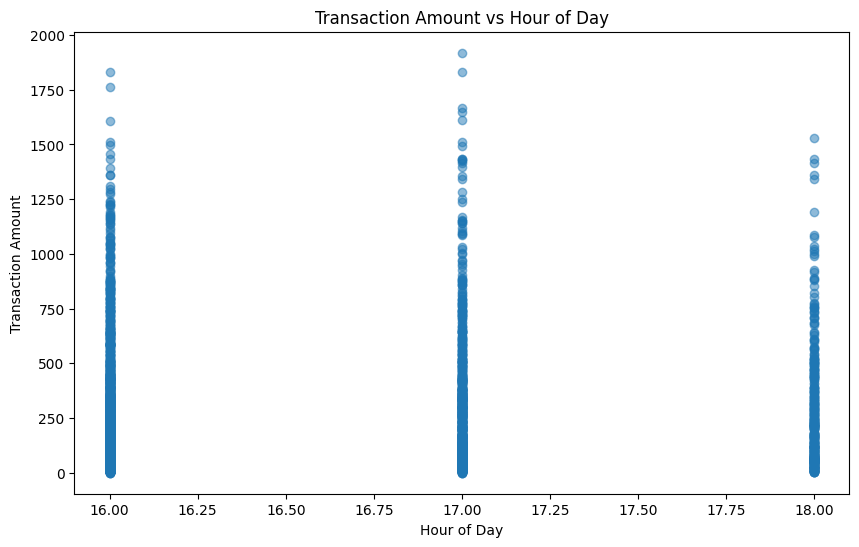

In [95]:
#Scatter amount vs hour.
plt.figure(figsize=(10,6))
plt.scatter(df['TransactionDate'].dt.hour, df['TransactionAmount'], alpha=0.5)
plt.title("Transaction Amount vs Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Amount")
plt.show()

**Insight**

The scatter plot visualizes the relationship between transaction amounts and the hours of the day when they occur. The horizontal axis represents the hour of the day (16:00–18:00), while the vertical axis indicates transaction amounts.

From the plot, we can observe that:

Transactions are concentrated at discrete hourly intervals—specifically around 16:00, 17:00, and 18:00—suggesting that transaction timestamps may be recorded in hourly batches rather than at minute-level precision.

The majority of transactions have relatively low amounts, clustering near the bottom of the vertical axis, indicating a higher frequency of smaller transactions.

A few transactions with significantly higher amounts (outliers) are visible across all three hours, reaching up to around 1,800–1,900 units. This suggests occasional large transactions but no specific hour seems to dominate in terms of large values.

No strong correlation is evident between the hour of the day and the transaction amount within this narrow time range, implying that transaction size is largely independent of the time of day in this dataset segment.

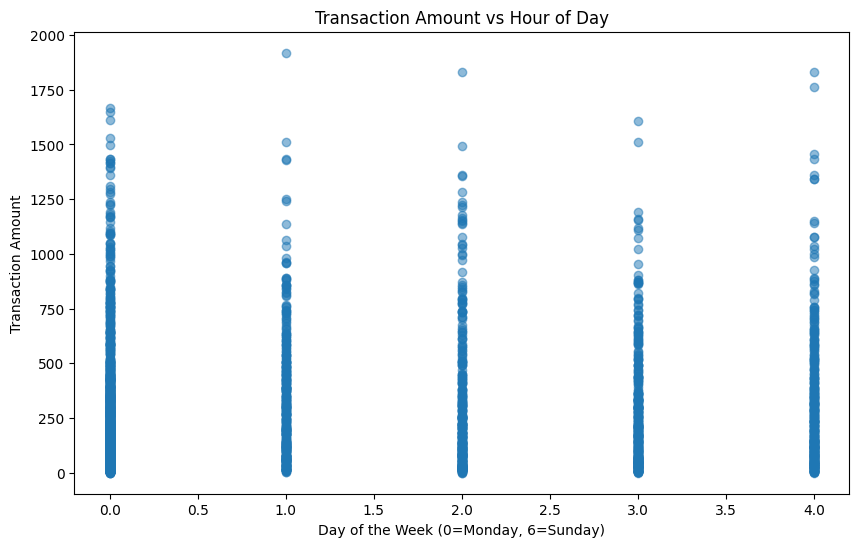

In [96]:
#Scatter amount vs day of the week.
plt.figure(figsize=(10,6))
plt.scatter(df['TransactionDate'].dt.day_of_week, df['TransactionAmount'], alpha=0.5)
plt.title("Transaction Amount vs Hour of Day")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Transaction Amount")
plt.show()

**Insight**

The scatter plot illustrates the relationship between transaction amounts and the days of the week. The horizontal axis represents days (encoded numerically from 0 = Monday to 6 = Sunday), while the vertical axis represents transaction amounts.

From the visualization, the following observations can be made:

- Transactions occur consistently throughout the weekdays specifically the working days (0–4) and not the weekends, indicating steady business or system activity across these days.

- Most transactions are of smaller amounts, clustering near the lower portion of the plot, which suggests that small-value transactions dominate daily activity.

- A few high-value transactions (outliers) are recorded on all days, with amounts reaching up to nearly 2,000 units. This indicates occasional large transactions but no specific weekday appears to dominate in terms of high-value activity.

- No strong trend or correlation is visible between transaction amount and day of the week, suggesting that transaction sizes are distributed fairly evenly across weekdays.

- Slight variations in density may hint that transaction frequency could be marginally higher on certain days (e.g., Monday or Friday), but the pattern is not pronounced enough to indicate a significant weekly trend.

### Feature engineering

In [104]:
# Adding relevant features for machine learning models
df["Hour"] = df["TransactionDate"].dt.hour #adding the hour of transaction feature
df["DayOfWeek"] = df["TransactionDate"].dt.dayofweek #adding the day of the week feature
df["IsWeekend"] = df["DayOfWeek"].apply(lambda x: 1 if x >=5 else 0) # adding a weekend feature

In [107]:
#Creating the TimeSinceLastTransaction column
df["TimeSinceLastTransaction"] = (df["TransactionDate"] - df["PreviousTransactionDate"]).dt.total_seconds().abs() #time difference in seconds
df["TimeSinceLastTransaction"].head()

0    49477140.0
1    42823500.0
2    41694660.0
3    47403420.0
4    33228900.0
Name: TimeSinceLastTransaction, dtype: float64

In [110]:
# Creating the BalanceChangeRatio column
df["BalanceChangeRatio"] = (df["TransactionAmount"]/df["AccountBalance"])
df["BalanceChangeRatio"].head()

0    0.002756
1    0.027345
2    0.112523
3    0.021531
4    0.001810
Name: BalanceChangeRatio, dtype: float64

In [113]:
#Creating IsNightTransaction column
df["IsNightTransaction"] = ((df["Hour"] >= 20) | (df["Hour"] < 6)).astype(int)
df["IsNightTransaction"].head()

0    0
1    0
2    0
3    0
4    0
Name: IsNightTransaction, dtype: int64

In [114]:
#Dropping unneeded columns from domain research and knowledge
df = df.drop(columns = ["TransactionID", "TransactionDate", "PreviousTransactionDate", "IP Address"])
df.head()

,AccountID,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Hour,DayOfWeek,IsWeekend,TimeSinceLastTransaction,BalanceChangeRatio,IsNightTransaction
0,AC00128,14.09,Debit,San Diego,D000380,M015,ATM,70,Doctor,81,1,5112.21,16,1,0,49477140.0,0.002756,0
1,AC00455,376.24,Debit,Houston,D000051,M052,ATM,68,Doctor,141,1,13758.91,16,1,0,42823500.0,0.027345,0
2,AC00019,126.29,Debit,Mesa,D000235,M009,Online,19,Student,56,1,1122.35,18,0,0,41694660.0,0.112523,0
3,AC00070,184.50,Debit,Raleigh,D000187,M002,Online,26,Student,25,1,8569.06,16,4,0,47403420.0,0.021531,0
4,AC00411,13.45,Credit,Atlanta,D000308,M091,Online,26,Student,198,1,7429.40,17,0,0,33228900.0,0.001810,0


In [ ]:
# Encoding Categorical Features
# Performing Frequency Encoding on AccountID column
account_freq = df['AccountID'].value_counts()
df['AccountID_FreqEnc'] = df['AccountID'].map(account_freq)
df.drop(columns=['AccountID'], inplace=True)
df.head()

,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Hour,DayOfWeek,IsWeekend,TimeSinceLastTransaction,BalanceChangeRatio,IsNightTransaction,AccountID_FreqEnc
0,14.09,Debit,San Diego,D000380,M015,ATM,70,Doctor,81,1,5112.21,16,1,0,49477140.0,0.002756,0,7
1,376.24,Debit,Houston,D000051,M052,ATM,68,Doctor,141,1,13758.91,16,1,0,42823500.0,0.027345,0,7
2,126.29,Debit,Mesa,D000235,M009,Online,19,Student,56,1,1122.35,18,0,0,41694660.0,0.112523,0,4
3,184.50,Debit,Raleigh,D000187,M002,Online,26,Student,25,1,8569.06,16,4,0,47403420.0,0.021531,0,8
4,13.45,Credit,Atlanta,D000308,M091,Online,26,Student,198,1,7429.40,17,0,0,33228900.0,0.001810,0,6


In [117]:
#Performing Frequency on the Device ID
device_freq = df['DeviceID'].value_counts()
df['DeviceID_FreqEnc'] = df['DeviceID'].map(device_freq)
df.drop(columns=['DeviceID'], inplace=True)
df.head()

,TransactionAmount,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Hour,DayOfWeek,IsWeekend,TimeSinceLastTransaction,BalanceChangeRatio,IsNightTransaction,AccountID_FreqEnc,DeviceID_FreqEnc
0,14.09,Debit,San Diego,M015,ATM,70,Doctor,81,1,5112.21,16,1,0,49477140.0,0.002756,0,7,6
1,376.24,Debit,Houston,M052,ATM,68,Doctor,141,1,13758.91,16,1,0,42823500.0,0.027345,0,7,5
2,126.29,Debit,Mesa,M009,Online,19,Student,56,1,1122.35,18,0,0,41694660.0,0.112523,0,4,5
3,184.50,Debit,Raleigh,M002,Online,26,Student,25,1,8569.06,16,4,0,47403420.0,0.021531,0,8,6
4,13.45,Credit,Atlanta,M091,Online,26,Student,198,1,7429.40,17,0,0,33228900.0,0.001810,0,6,3


In [125]:
df

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Hour,DayOfWeek,IsWeekend,TimeSinceLastTransaction,BalanceChangeRatio,IsNightTransaction,AccountID_FreqEnc,DeviceID_FreqEnc
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,16,1,0,49477140.0,0.002756,0,7,6
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,16,1,0,42823500.0,0.027345,0,7,5
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,18,0,0,41694660.0,0.112523,0,4,5
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,16,4,0,47403420.0,0.021531,0,8,6
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,17,0,0,33228900.0,0.001810,0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,Credit,Colorado Springs,Branch,33,Doctor,109,1,12690.79,17,2,0,48178920.0,0.067467,0,10,3
2508,251.54,Debit,Tucson,Branch,48,Doctor,177,1,254.75,17,2,0,51201300.0,0.987399,0,9,5
2509,28.63,Debit,San Diego,Branch,56,Retired,146,1,3382.91,17,0,0,38070000.0,0.008463,0,8,5
2510,185.97,Debit,Denver,Online,23,Student,19,1,1776.91,16,4,0,53452080.0,0.104659,0,4,2


In [126]:
#Encoding the remaining categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['TransactionType', 'Location', 'Channel']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [127]:
#Encoding the Customer Occupation
df['CustomerOccupation'] = label_encoder.fit_transform(df['CustomerOccupation'])

In [128]:
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Hour,DayOfWeek,IsWeekend,TimeSinceLastTransaction,BalanceChangeRatio,IsNightTransaction,AccountID_FreqEnc,DeviceID_FreqEnc
0,14.09,1,36,0,70,0,81,1,5112.21,16,1,0,49477140.0,0.002756,0,7,6
1,376.24,1,15,0,68,0,141,1,13758.91,16,1,0,42823500.0,0.027345,0,7,5
2,126.29,1,23,2,19,3,56,1,1122.35,18,0,0,41694660.0,0.112523,0,4,5
3,184.50,1,33,2,26,3,25,1,8569.06,16,4,0,47403420.0,0.021531,0,8,6
4,13.45,0,1,2,26,3,198,1,7429.40,17,0,0,33228900.0,0.001810,0,6,3


In [129]:
#Scaling the entire dataset using robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [130]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Hour,DayOfWeek,IsWeekend,TimeSinceLastTransaction,BalanceChangeRatio,IsNightTransaction,AccountID_FreqEnc,DeviceID_FreqEnc
0,-0.592378,0.0,0.75,-0.5,0.78125,-0.5,-0.321429,0.0,0.061009,0.0,0.000000,0.0,0.467784,-0.368297,0.0,0.333333,0.666667
1,0.496329,0.0,-0.30,-0.5,0.71875,-0.5,0.290816,0.0,1.461410,0.0,0.000000,0.0,0.053972,-0.184103,0.0,0.333333,0.333333
2,-0.255079,0.0,0.10,0.5,-0.81250,0.5,-0.576531,0.0,-0.585179,2.0,-0.333333,0.0,-0.016234,0.453954,0.0,-0.666667,0.333333
3,-0.080086,0.0,0.60,0.5,-0.59375,0.5,-0.892857,0.0,0.620873,0.0,1.000000,0.0,0.338813,-0.227657,0.0,0.666667,0.666667
4,-0.594302,-1.0,-1.00,0.5,-0.59375,0.5,0.872449,0.0,0.436296,1.0,-0.333333,0.0,-0.542748,-0.375382,0.0,0.000000,-0.333333


### Training the Models

**Models to train:**

- isolation forest
- lof (local outlier factor)
- oneclass svm

In [132]:
# Duplicating the dataset for training
original_scaled = df_scaled.copy()

In [131]:
# Training with Isolation Forest
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination = 0.05, random_state=40, n_estimators = 200)

In [134]:
#fitting the model on the data set
iso.fit(df_scaled)

,n_estimators,200
,max_samples,'auto'
,contamination,0.05
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,40
,verbose,0
,warm_start,False


In [135]:
# Predicting anomalies
df_scaled['IF_Pred'] = iso.predict(df_scaled)

In [ ]:
# Converting output to 0 (not flagged) and 1 (flagged)
df_scaled['IF_Pred'] = df_scaled['IF_Pred'].map({1: 0, -1: 1})

In [137]:
df_scaled

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Hour,DayOfWeek,IsWeekend,TimeSinceLastTransaction,BalanceChangeRatio,IsNightTransaction,AccountID_FreqEnc,DeviceID_FreqEnc,IF_Pred
0,-0.592378,0.0,0.75,-0.5,0.78125,-0.500000,-0.321429,0.0,0.061009,0.0,0.000000,0.0,0.467784,-0.368297,0.0,0.333333,0.666667,0
1,0.496329,0.0,-0.30,-0.5,0.71875,-0.500000,0.290816,0.0,1.461410,0.0,0.000000,0.0,0.053972,-0.184103,0.0,0.333333,0.333333,0
2,-0.255079,0.0,0.10,0.5,-0.81250,0.500000,-0.576531,0.0,-0.585179,2.0,-0.333333,0.0,-0.016234,0.453954,0.0,-0.666667,0.333333,0
3,-0.080086,0.0,0.60,0.5,-0.59375,0.500000,-0.892857,0.0,0.620873,0.0,1.000000,0.0,0.338813,-0.227657,0.0,0.666667,0.666667,0
4,-0.594302,-1.0,-1.00,0.5,-0.59375,0.500000,0.872449,0.0,0.436296,1.0,-0.333333,0.0,-0.542748,-0.375382,0.0,0.000000,-0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,1.939229,-1.0,-0.70,0.0,-0.37500,-0.500000,-0.035714,0.0,1.288419,1.0,0.333333,0.0,0.387044,0.116446,0.0,1.333333,-0.333333,0
2508,0.121452,0.0,0.95,0.0,0.09375,-0.500000,0.658163,0.0,-0.725694,1.0,0.333333,0.0,0.575015,7.007563,0.0,1.000000,0.333333,0
2509,-0.548667,0.0,0.75,0.0,0.34375,0.166667,0.341837,0.0,-0.219064,1.0,-0.333333,0.0,-0.241664,-0.325546,0.0,0.666667,0.333333,0
2510,-0.075667,0.0,-0.55,0.5,-0.68750,0.500000,-0.954082,0.0,-0.479168,0.0,1.000000,0.0,0.714999,0.395048,0.0,-0.666667,-0.666667,0


In [139]:
#evaluating the Isolation Forest model
from sklearn.metrics import silhouette_score

scores = iso.decision_function(original_scaled)  # anomaly score: higher = more normal
silhouette = silhouette_score(original_scaled, df_scaled['IF_Pred'])
print("Silhouette Score:", silhouette)
print("Anomaly Ratio:", df_scaled['IF_Pred'].mean())
print("Avg Decision Score:", scores.mean())


Silhouette Score: 0.601021842152049
Anomaly Ratio: 0.05015923566878981
Avg Decision Score: 0.06260707717459477


| Metric                         | Interpretation                                      | Verdict                  |
| ------------------------------ | --------------------------------------------------- | ------------------------ |
| **Silhouette Score (0.601)**   | Clear, well-separated clusters of normal vs anomaly | Strong separation     |
| **Anomaly Ratio (0.05)**       | 5% anomalies; balanced detection rate              | Reasonable             |
| **Avg Decision Score (0.063)** | Mostly normal data; few flagged points              | Healthy model behavior |


**Metrics explanation**

**a. The Silhouette Score:**

The Silhouette Score measures how clear the model separates the “normal” and “anomaly” groups. Basically, how distinct those two clusters are.

Ranges from –1 → 1

- '> 0.5' → clear separation (clusters are distinct)

- '0.2–0.5' → moderate separation

- '< 0.2' → weak or overlapping clusters

- '< 0' → bad separation (anomalies mix with normals)


**b. The Anomaly Ratio:**

This shows the fraction of all transactions that your model flagged as anomalies.

Since the contamination=0.02 (2%) or a similar value, the model detected about 5% anomalies; slightly higher, but still reasonable.

- If too low (< 1%) → the model may be too strict and miss frauds.

- If too high (> 10%) → the model may be too sensitive and flag too many normal transactions.


**c. The Average decision score:**

The decision score is the model’s confidence or distance from the anomaly boundary:

- Higher (positive) → normal transaction

- Lower (negative) → anomaly

So, the average being slightly positive (0.06) means that, overall, most transactions are confidently normal.
Only a small fraction sit near or below zero, which matches the 5% anomaly rate.

In [140]:
#Training the LOF model
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(contamination=0.05, n_neighbors=20)


In [141]:
#copying the scaled dataframe for LOF model from the original scaled dataframe
df_lof = original_scaled.copy()

In [142]:
#Prredicting anomalies using LOF
df_lof['LOF_Pred'] = lof.fit_predict(df_lof)
df_lof['LOF_Pred'] = df_lof['LOF_Pred'].map({1: 0, -1: 1})

In [143]:
df_lof

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Hour,DayOfWeek,IsWeekend,TimeSinceLastTransaction,BalanceChangeRatio,IsNightTransaction,AccountID_FreqEnc,DeviceID_FreqEnc,LOF_Pred
0,-0.592378,0.0,0.75,-0.5,0.78125,-0.500000,-0.321429,0.0,0.061009,0.0,0.000000,0.0,0.467784,-0.368297,0.0,0.333333,0.666667,0
1,0.496329,0.0,-0.30,-0.5,0.71875,-0.500000,0.290816,0.0,1.461410,0.0,0.000000,0.0,0.053972,-0.184103,0.0,0.333333,0.333333,0
2,-0.255079,0.0,0.10,0.5,-0.81250,0.500000,-0.576531,0.0,-0.585179,2.0,-0.333333,0.0,-0.016234,0.453954,0.0,-0.666667,0.333333,0
3,-0.080086,0.0,0.60,0.5,-0.59375,0.500000,-0.892857,0.0,0.620873,0.0,1.000000,0.0,0.338813,-0.227657,0.0,0.666667,0.666667,0
4,-0.594302,-1.0,-1.00,0.5,-0.59375,0.500000,0.872449,0.0,0.436296,1.0,-0.333333,0.0,-0.542748,-0.375382,0.0,0.000000,-0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,1.939229,-1.0,-0.70,0.0,-0.37500,-0.500000,-0.035714,0.0,1.288419,1.0,0.333333,0.0,0.387044,0.116446,0.0,1.333333,-0.333333,0
2508,0.121452,0.0,0.95,0.0,0.09375,-0.500000,0.658163,0.0,-0.725694,1.0,0.333333,0.0,0.575015,7.007563,0.0,1.000000,0.333333,0
2509,-0.548667,0.0,0.75,0.0,0.34375,0.166667,0.341837,0.0,-0.219064,1.0,-0.333333,0.0,-0.241664,-0.325546,0.0,0.666667,0.333333,0
2510,-0.075667,0.0,-0.55,0.5,-0.68750,0.500000,-0.954082,0.0,-0.479168,0.0,1.000000,0.0,0.714999,0.395048,0.0,-0.666667,-0.666667,0


In [144]:
#Evaluating the LOF model
from sklearn.metrics import silhouette_score
scores_lof = lof.negative_outlier_factor_  # anomaly score: higher = more normal
silhouette_lof = silhouette_score(original_scaled, df_lof['LOF_Pred'])
print("Silhouette Score (LOF):", silhouette_lof)
print("Anomaly Ratio (LOF):", df_lof['LOF_Pred'].mean())
print("Avg Decision Score (LOF):", scores_lof.mean())

Silhouette Score (LOF): 0.512478220301877
Anomaly Ratio (LOF): 0.05015923566878981
Avg Decision Score (LOF): -1.0545155512149487


| **Metric**                      | **Interpretation**                                                                                                                                                             | **Verdict**                             |
| ------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | --------------------------------------- |
| **Silhouette Score (0.512)**    | Moderate separation between normal and anomalous transactions — decent, but not as distinct as Isolation Forest or OCSVM.                                                      | **Acceptable but weaker separation** |
| **Anomaly Ratio (0.05)**        | Same 5% anomaly rate — consistent with other models, indicating stable contamination settings.                                                                                 | **Balanced anomaly detection**       |
| **Avg Decision Score (-1.055)** | Negative mean score implies that on average, transactions are slightly closer to the outlier boundary; the model is more conservative (flags slightly more borderline points). | **Cautious model; may over-flag**   |


In [145]:
#Training OneClass SVM model
from sklearn.svm import OneClassSVM
oc_svm = OneClassSVM(nu=0.05, kernel='rbf', gamma='scale')

In [146]:
#copying the scaled dataframe for one class SVM model from the original scaled dataframe
df_ocsvm = original_scaled.copy()

In [147]:
#fitting the OneClass SVM model on the dataset
oc_svm.fit(df_ocsvm)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,nu,0.05
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [148]:
#predicting anomalies using OneClass SVM
df_ocsvm['OCSVM_Pred'] = oc_svm.predict(df_ocsvm)

In [149]:
#Making the output 0 (not flagged) and 1 (flagged)
df_ocsvm["OCSVM_Pred"] = df_ocsvm['OCSVM_Pred'].map({1: 0, -1: 1})
df_ocsvm

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Hour,DayOfWeek,IsWeekend,TimeSinceLastTransaction,BalanceChangeRatio,IsNightTransaction,AccountID_FreqEnc,DeviceID_FreqEnc,OCSVM_Pred
0,-0.592378,0.0,0.75,-0.5,0.78125,-0.500000,-0.321429,0.0,0.061009,0.0,0.000000,0.0,0.467784,-0.368297,0.0,0.333333,0.666667,0
1,0.496329,0.0,-0.30,-0.5,0.71875,-0.500000,0.290816,0.0,1.461410,0.0,0.000000,0.0,0.053972,-0.184103,0.0,0.333333,0.333333,0
2,-0.255079,0.0,0.10,0.5,-0.81250,0.500000,-0.576531,0.0,-0.585179,2.0,-0.333333,0.0,-0.016234,0.453954,0.0,-0.666667,0.333333,0
3,-0.080086,0.0,0.60,0.5,-0.59375,0.500000,-0.892857,0.0,0.620873,0.0,1.000000,0.0,0.338813,-0.227657,0.0,0.666667,0.666667,0
4,-0.594302,-1.0,-1.00,0.5,-0.59375,0.500000,0.872449,0.0,0.436296,1.0,-0.333333,0.0,-0.542748,-0.375382,0.0,0.000000,-0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,1.939229,-1.0,-0.70,0.0,-0.37500,-0.500000,-0.035714,0.0,1.288419,1.0,0.333333,0.0,0.387044,0.116446,0.0,1.333333,-0.333333,0
2508,0.121452,0.0,0.95,0.0,0.09375,-0.500000,0.658163,0.0,-0.725694,1.0,0.333333,0.0,0.575015,7.007563,0.0,1.000000,0.333333,0
2509,-0.548667,0.0,0.75,0.0,0.34375,0.166667,0.341837,0.0,-0.219064,1.0,-0.333333,0.0,-0.241664,-0.325546,0.0,0.666667,0.333333,0
2510,-0.075667,0.0,-0.55,0.5,-0.68750,0.500000,-0.954082,0.0,-0.479168,0.0,1.000000,0.0,0.714999,0.395048,0.0,-0.666667,-0.666667,0


In [150]:
#Evaluating the one Class SVM model
from sklearn.metrics import silhouette_score
scores_ocsvm = oc_svm.decision_function(original_scaled)  # anomaly score: higher = more normal
silhouette_ocsvm = silhouette_score(original_scaled, df_ocsvm['OCSVM_Pred'])
print("Silhouette Score (OCSVM):", silhouette_ocsvm)
print("Anomaly Ratio (OCSVM):", df_ocsvm['OCSVM_Pred'].mean())
print("Avg Decision Score (OCSVM):", scores_ocsvm.mean())

Silhouette Score (OCSVM): 0.6484740893238816
Anomaly Ratio (OCSVM): 0.05015923566878981
Avg Decision Score (OCSVM): 2.9213076673722798


| **Metric**                     | **Interpretation**                                                                                                                 | **Verdict**                       |
| ------------------------------ | ---------------------------------------------------------------------------------------------------------------------------------- | --------------------------------- |
| **Silhouette Score (0.648)**   | Very strong separation between normal and anomalous transactions — the clusters are clearly distinguishable in feature space.      | **Excellent separation**        |
| **Anomaly Ratio (0.05)**       | About 5% of data points were flagged as anomalies, which matches a realistic contamination rate.                                   | **Balanced anomaly detection** |
| **Avg Decision Score (2.921)** | The high positive score indicates the majority of transactions are confidently classified as normal, with few flagged as outliers. | **Healthy, confident model**   |


##### GENERAL OVERVIEW OF THE PERFORMANCE OF TH THREE MODELS

| **Aspect**                     | **Isolation Forest**                                       | **One-Class SVM**                         | **Local Outlier Factor**                                  |
| ------------------------------ | ---------------------------------------------------------- | ----------------------------------------- | --------------------------------------------------------- |
| **Detection Mechanism**        | Randomly isolates data points; anomalies need fewer splits | Learns a boundary enclosing “normal” data | Measures local density to detect points in sparse regions |
| **Performance Summary**        | Reliable, interpretable, and balanced                      | Most robust and confident                 | Sensitive, slightly over-cautious                         |
| **Best For**                   | General-purpose anomaly detection                          | High-quality, well-separated datasets     | Localized, small-scale or density-based anomalies         |
| **Silhouette Interpretation**  | Strong separation (0.601)                                  | Excellent separation (0.648)              | Moderate separation (0.512)                               |
| **Decision Boundary Behavior** | Adaptive and flexible                                      | Very tight, smooth hyperplane             | Local neighborhood–dependent                              |
| **Overall Verdict**            | **Good, stable performer**                              | **Best performer overall**             | **Acceptable, cautious detector**                      |
